# Downloading datset

In [1]:
#Downloading facial age dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d frabbisw/facial-age

 98% 825M/840M [00:05<00:00, 196MB/s]
100% 840M/840M [00:05<00:00, 152MB/s]


In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#unzipping files
import zipfile
zip_ref = zipfile.ZipFile('/content/facial-age.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#loading images
ds = keras.utils.image_dataset_from_directory(
    directory='/content/face_age',
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(256, 256)
)

Found 19556 files belonging to 100 classes.


# Generating images and diplaying

In [5]:
#splitting dataset into train and test
x_train =ds
y_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/face_age',
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=42
)

Found 19556 files belonging to 100 classes.
Using 3911 files for validation.


In [6]:
class_names = ds.class_names
class_names[:5]

['001', '002', '003', '004', '005']

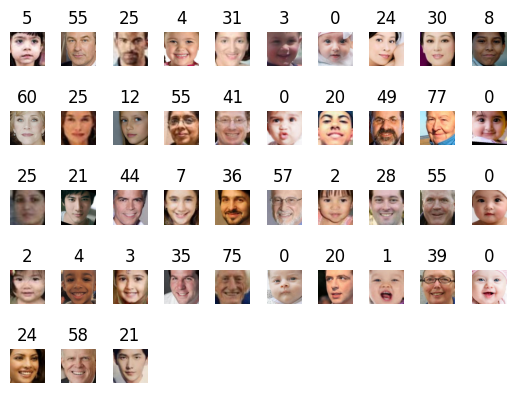

In [44]:
#displaying few images
for images, labels in x_train.take(1):
    count = 0
    for i in range(len(labels)):
        age = labels[i].numpy()
        if age != 99 and count < 47:
            plt.subplot(5, 10, count + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"{age}")
            plt.axis("off")
            count += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Detecting faces using DLib face detector

In [45]:
import dlib
import cv2

In [46]:
# Loading the Dlib face detector
detector = dlib.get_frontal_face_detector()

In [47]:
# Testing an image
image_path = "/content/1037.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detecting faces in the image
faces = detector(image_rgb)

### Drawing a red box outside the face detected by DLib

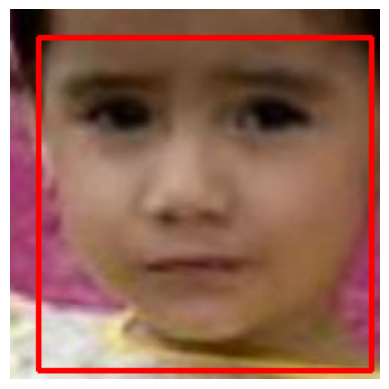

In [48]:
# Drawing bounding boxes
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Testing with another image

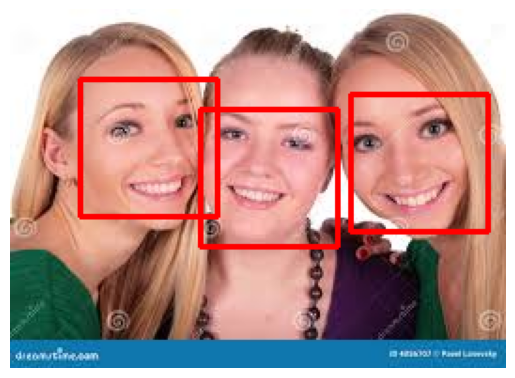

In [49]:
image_path = "/content/images.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faces = detector(image_rgb)

for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()